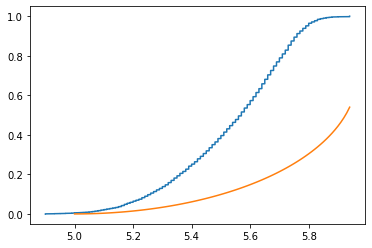

In [20]:
"""
scatterplot taken from here
https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/
"""

#read from csv and sort relevant data by timestamp
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# get the relevant strategy data
raw = pd.read_csv("cdf.csv")
lam = 5
gam = 4.4
rho = 3
strategies = []
game = "greed"

df = pd.DataFrame()
for col in raw.columns:
    for item in raw[col]:
        strategies.append(item)

x = np.sort(strategies)
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)

cdfx = np.arange(5, 5.94, 0.01)
if game == "fear":
    cdfy = gam - rho + np.sqrt((gam + rho) ** 2 - 4 * ((1 + rho) * (gam - 1) * (1 + lam ** 2))/(1 + 2 * lam * cdfx - cdfx ** 2))
if game == "greed":
    cdfy = gam - rho - np.sqrt((gam + rho) ** 2 - 4 * gam * rho * (1 + lam ** 2)/(1 + 2 * lam * cdfx - cdfx ** 2))
cdfy = cdfy/2

plt.plot(cdfx, cdfy)

plt.show()